In [1]:
# club

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler

data = pd.read_csv("C:\\Users\\co279\\penalty.csv")

data = data.iloc[:, 4:]
data.dropna(inplace=True)

# data preprocessing
data = pd.get_dummies(data, columns=['position'])
data = pd.get_dummies(data, columns=['order'])

# label encoding 'score' column
label_encoder = LabelEncoder()
data['score'] = label_encoder.fit_transform(data['score'])

scaler = StandardScaler()
data[['goals','age']] = scaler.fit_transform(data[['goals','age']])

# data spliting (X, y)
X = data.drop(columns=['score'])
y = data['score']

# data spliting (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=411, stratify=y)

# oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=411)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# lightgbm
lgb_model = lgb.LGBMClassifier(random_state=411)
lgb_model.fit(X_resampled, y_resampled)

y_pred = lgb_model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("f1_score:", f1)

roc = roc_auc_score(y_test, y_pred)
print("roc_auc:", roc)

mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1332, number of negative: 1332
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 2664, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
accuracy: 0.6272727272727273
f1_score: 0.31092436974789917
roc_auc: 0.532312733024517
MCC: 0.06030697297802698
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       334
           1       0.28      0.35      0.31       106

    accuracy                           0.63       440
   macro avg       0.53      0.53      0.53       440
weighted avg       0.66      0.63      0.64       440

Confusion Matrix:
[[239  95]
 [ 69  37]]

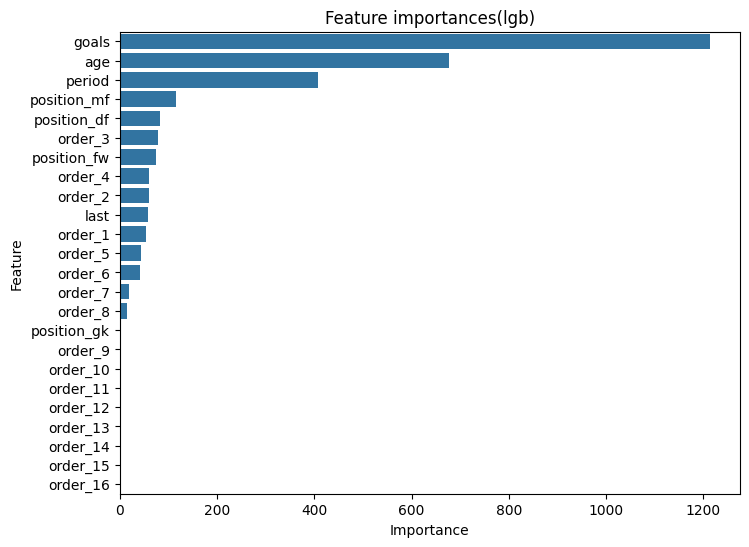

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X_resampled_df = pd.DataFrame(X_resampled, columns=data.drop(columns=['score']).columns)

# feature importance visualization
ftr_importances_values = lgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_resampled_df.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances(lgb)')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [3]:
# international

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler

data = pd.read_csv("C:\\Users\\co279\\penalty_international.csv")

data = data.iloc[:, 4:]
data.dropna(inplace=True)

# data preprocessing
data = pd.get_dummies(data, columns=['position'])
data = pd.get_dummies(data, columns=['order'])

# label encoding 'score' column
label_encoder = LabelEncoder()
data['score'] = label_encoder.fit_transform(data['score'])

scaler = StandardScaler()
data[['goals','age']] = scaler.fit_transform(data[['goals','age']])

# data spliting (X, y)
X = data.drop(columns=['score'])
y = data['score']

# data spliting (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=411, stratify=y)

# oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=411)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Lightgbm
lgb_model = lgb.LGBMClassifier(random_state=411)
lgb_model.fit(X_resampled, y_resampled)

y_pred = lgb_model.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("f1_score:", f1)

roc = roc_auc_score(y_test, y_pred)
print("roc_auc:", roc)

mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 255, number of negative: 255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 510, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

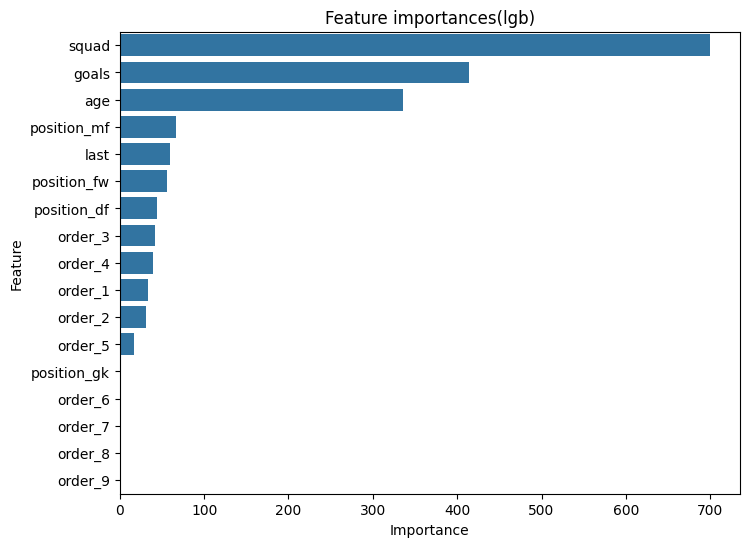

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X_resampled_df = pd.DataFrame(X_resampled, columns=data.drop(columns=['score']).columns)

# feature importance visualization
ftr_importances_values = lgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_resampled_df.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances(lgb)')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()